# Principal Component Analysis (PCA)

---

## Introduction 

Principal Component Analysis (PCA) is a statistical procedure and a form of dimensionality reduction widely used in the fields of machine learning and data analysis. The primary goal of PCA is to transform a high-dimensional dataset into a lower-dimensional space, while preserving as much of the significant information as possible. This is achieved by finding new, uncorrelated variables known as principal components (PCs). Each of these PCs is a linear combination of the original variables and they are extracted in such a way that the first principal component accounts for the maximum variance in the dataset. Each succeeding component then accounts for the highest remaining variance while being orthogonal (uncorrelated) to the preceding ones.

---

## Algorithm 

The following steps are involved in PCA:

1. Standardize the data.
2. Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
3. Sort eigenvalues in descending order and choose the *k* eigenvectors that correspond to the *k* largest eigenvalues where *k* is the number of dimensions of the new feature subspace (*k* ≤ *d*).
4. Construct the projection matrix **W** from the selected *k* eigenvectors.
5. Transform the original dataset **X** via **W** to obtain a *k*-dimensional feature subspace **Y**.

---

## Derivation

Let's assume we have a dataset $X$, which is an $n \times p$ matrix, representing $n$ observations of $p$ variables. For PCA, we assume that this data has been centered, that is, the mean of each variable has been subtracted so that it is now zero.

The goal of PCA is to find a projection that captures the largest amount of variance in the data. Mathematically, we're looking to find a vector `a` that maximizes the variance $Var(a^T X)$ of the projected data. This can be written as:

\begin{equation}
\max_a \quad Var(a^T X)
\end{equation}

The variance can be re-expressed in terms of the covariance matrix $C$ of $X$:

\begin{equation}
Var(a^T X) = a^T C a
\end{equation}

We also want the vector `a` to have unit length, because without this constraint we could increase the variance arbitrarily by scaling `a`. This introduces a constraint $a^T a = 1$:

\begin{equation}
\max_a \quad a^T C a  \quad s.t. \quad a^T a = 1
\end{equation}

This is a constrained optimization problem that can be solved using the method of Lagrange multipliers. We form the Lagrangian of this problem:

\begin{equation}
L(a, \lambda) = a^T C a - \lambda (a^T a - 1)
\end{equation}

Taking the derivative of the Lagrangian with respect to `a` and setting it to zero gives us the following equation:

\begin{equation}
C a - \lambda a = 0
\end{equation}

This is the eigenvalue equation for the matrix `C`. The vectors `a` that satisfy this equation are the eigenvectors of `C`, and the corresponding values of $\lambda$ are the eigenvalues.

The maximum variance projection is given by the eigenvector corresponding to the largest eigenvalue. This is the first principal component. The second principal component is the eigenvector corresponding to the second largest eigenvalue, and so on.

---

## Illustration

<img src="https://knowledge.dataiku.com/latest/_images/stats-PCA-example.png" width="600">

This Plot shows the original data is in three dimensions represent the hight, width and depth of the cube. And apply PCA can reduce the dimension to two dimensions by finding the two vectors that capture the most variance in the data, that still carry most of the information of the cube. 

---

## Implementation



In [20]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
penguins = pd.read_csv("palmer_penguins.csv")

#drop the first column
penguins = penguins.drop(['Unnamed: 0'], axis=1)

#drop the rows with missing values
penguins = penguins.dropna()

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,Male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male


In [21]:
# Select only the numeric columns (feature variables)
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x = penguins.loc[:, features].values

# Standardize the feature variables
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])


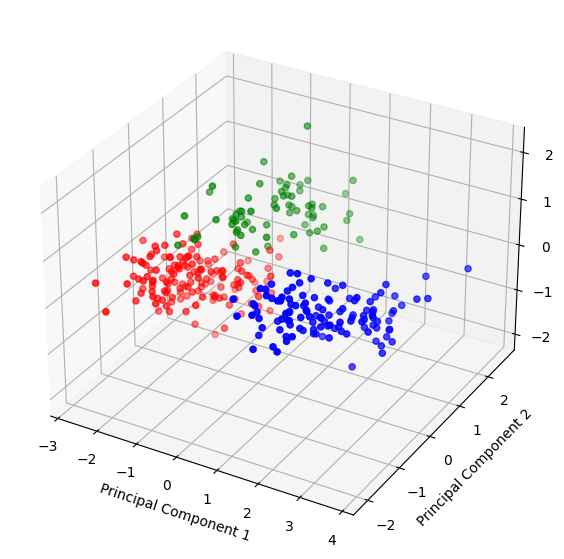

In [23]:
# Add species information to the PCA DataFrame
pca_df = pd.concat([pca_df, penguins[['species']].reset_index(drop=True)], axis = 1)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = {'Adelie':'r', 'Chinstrap':'g', 'Gentoo':'b'}
ax.scatter(pca_df['principal component 1'], pca_df['principal component 2'], pca_df['principal component 3'], 
           c=pca_df['species'].apply(lambda x: colors[x]))

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


## Conclusion

PCA is a method for reducing the dimensionality of data with its limitation. It is useful while interpreting of the data is not important, so by reduced the dimensionality of the data could be vary useful for the computation. Bwlow is a comparsion between PCA and LASSO. 

Both PCA and Lasso are useful techniques in data analysis and machine learning, but they serve different purposes and are used in different situations. Here are some reasons why you might choose to use PCA:

1. Multicollinearity: If your dataset has multicollinearity (highly correlated predictor variables), this can be a problem for some types of models, such as linear regression. PCA can help address this issue because the principal components are orthogonal to each other, which means they are uncorrelated.

2. Data Compression and Efficiency: PCA is a form of data compression. If you have a dataset with a very large number of features, PCA can help reduce this to a smaller number of features (principal components) while retaining most of the information in the data. This can make subsequent analysis or modeling more computationally efficient.

3. Visualization: PCA can be useful for visualizing high-dimensional data. By reducing the data to two or three dimensions, you can plot it and potentially identify patterns or clusters in the data.

4. Noise Reduction: PCA can help separate signal from noise in your data. The first few principal components often capture the bulk of the variation in the data, while the later components are more likely to represent noise.

Lasso (Least Absolute Shrinkage and Selection Operator) regression also offers a form of dimensionality reduction and has the added benefit of being easier to interpret than PCA.

Lasso is a regularization method that can be used to prevent overfitting in a model. It does this by adding a penalty term to the cost function in regression that effectively reduces the coefficients of less important features to zero, thereby performing feature selection.

The key difference between Lasso and PCA is that Lasso retains the original features, whereas PCA transforms them into new principal components. This makes the results of Lasso easier to interpret in terms of the original variables.

Whether to use PCA, Lasso, or another method entirely will depend on the specific needs of your project. If interpretability is a high priority, Lasso might be a better choice. If dealing with multicollinearity or a very large number of features is a concern, PCA might be more appropriate. Ultimately, the choice of technique should be guided by a combination of domain knowledge, the requirements of the project, and the characteristics of the data.